In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [5]:
sns.color_palette(cccpalette)

In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 6.00e-01, 5.18e+04
gamma^D_h  = 6.00e-01, 5.18e+04
R_p  = 7.00e+00, 6.05e+05
R_h  = 4.50e+00, 3.89e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 1.16e-06, 1.00e-01
E^I_h  = 0.00e+00, 0.00e+00
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 1.43e-01, 1.23e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 2.50e-01, 2.16e+04
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 0.00e+00, 0.00e+00
Vmax^IN_p  = 8.10e-06, 7.00e-01
Vmax^OC_p  = 0.00e+00, 0.00e+00
Vmax^IC_p  = 5.67e-05, 4.90e+00
Vmax^ON_h  = 1.50e-05, 1.30e+00
Vmax^IN_h  = 1.50e-05, 1.30e+00
Vmax^OC_h  = 6.77e-05, 5.85e+00
Vmax^IC_h  = 0.00e+00, 0.00e+00
O_h  = 1.00e+00, 8.64e+04
O_p  = 1.00e+00, 8.64e+04
E^ROS_p  = 6.48e-07, 5.60e-02
E^ROS_h  = 4.05e-07, 3.50e-02
VROSmax  = 7.70e-06, 6.65e-01
KROS_h  = 2.50e-01, 2.16e+04
omega_p  = 1.00e-02, 8.64e+02
omega_h  = 1.00e-05, 8.64e-01
R

In [8]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

In [9]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_ponly_data()

In [10]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 6.42e-06, init Bp = 1.79e+00, newval = 1.79e+00
dDON/dt = 3.31e-06, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 8.27e-07, init RDON = 0.00e+00, newval = 8.27e-07
dDIN/dt = -1.06e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = 2.33e-05, init DOC = 1.32e+02, newval = 1.33e+02
dRDOC/dt = 5.79e-06, init RDOC = 0.00e+00, newval = 5.79e-06
dDIC/dt = -7.40e-05, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = -2.00e-03, init ROS = 2.00e-01, newval = 1.98e-01
dABp/dt = 1.16e-16, init ABp = 0.00e+00, newval = 1.16e-16
dABh/dt = 0.00e+00, init ABh = 0.00e+00, newval = 0.00e+00


In [11]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
limINp = 9.99e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
gross_uptakeINp = 1.44e-05
gross_uptakeONp = 0.00e+00
gross_uptakeICp = 1.01e-04
gross_uptakeOCp = 0.00e+00
net_uptakeNp = 1.44e-05
overflowNp = 0.00e+00
overflowCp = 1.39e-07
deathp = 2.07e-06
leakinessOp = 2.07e-06
leakinessIp = 0.00e+00
ROSreleasep = 1.16e-06
respirationp = 3.86e-06
dic_air_water_exchange = -1.04e-16


In [12]:
biomass_diff0_ponly(calc_dydt, var_names,init_vars)


dBp/dt  + dDON/dt + dRDON/dt + dDIN/dt = -1.1575382850587818e-16


In [13]:
var_names

['Bp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'ABp', 'ABh']

In [14]:
init_vars

In [15]:
#sol = run_solver(calc_dydt, init_vars)
sol = run_solver(calc_dydt, init_vars, days=140, t_eval=get_t_eval(maxday=140, step = 3600*4, ref_times = refdf['t']))

simulation time 10.25


In [16]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [17]:
df.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,...,overflowCp,deathp,leakinessOp,leakinessIp,ROSreleasep,respirationp,dic_air_water_exchange,Bp[C],ABp[C],ABh[C]
0,1.785714,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.200000,0.000000e+00,0.0,...,1.392646e-07,0.000002,0.000002,0.0,0.000001,0.000004,-1.040834e-16,12.500000,0.000000e+00,0.0
1,1.881028,20.048879,0.012220,99.843587,132.844216,0.085538,2999.040262,0.000122,1.218745e-14,0.0,...,1.472278e-07,0.000002,0.000002,0.0,0.000001,0.000004,1.839497e-05,13.167199,8.531215e-14,0.0
2,1.981433,20.100367,0.025092,99.678823,133.206809,0.175642,2998.260756,0.000128,1.283798e-14,0.0,...,1.553498e-07,0.000002,0.000002,0.0,0.000001,0.000004,3.333550e-05,13.870029,8.986588e-14,0.0
3,2.087196,20.154603,0.038651,99.505265,133.588761,0.270555,2997.615294,0.000135,1.352324e-14,0.0,...,1.639355e-07,0.000002,0.000002,0.0,0.000001,0.000005,4.570686e-05,14.610369,9.466265e-14,0.0
4,2.198603,20.211734,0.052934,99.322444,133.991104,0.370535,2997.068666,0.000142,1.424506e-14,0.0,...,1.730131e-07,0.000003,0.000003,0.0,0.000001,0.000005,5.618391e-05,15.390222,9.971543e-14,0.0


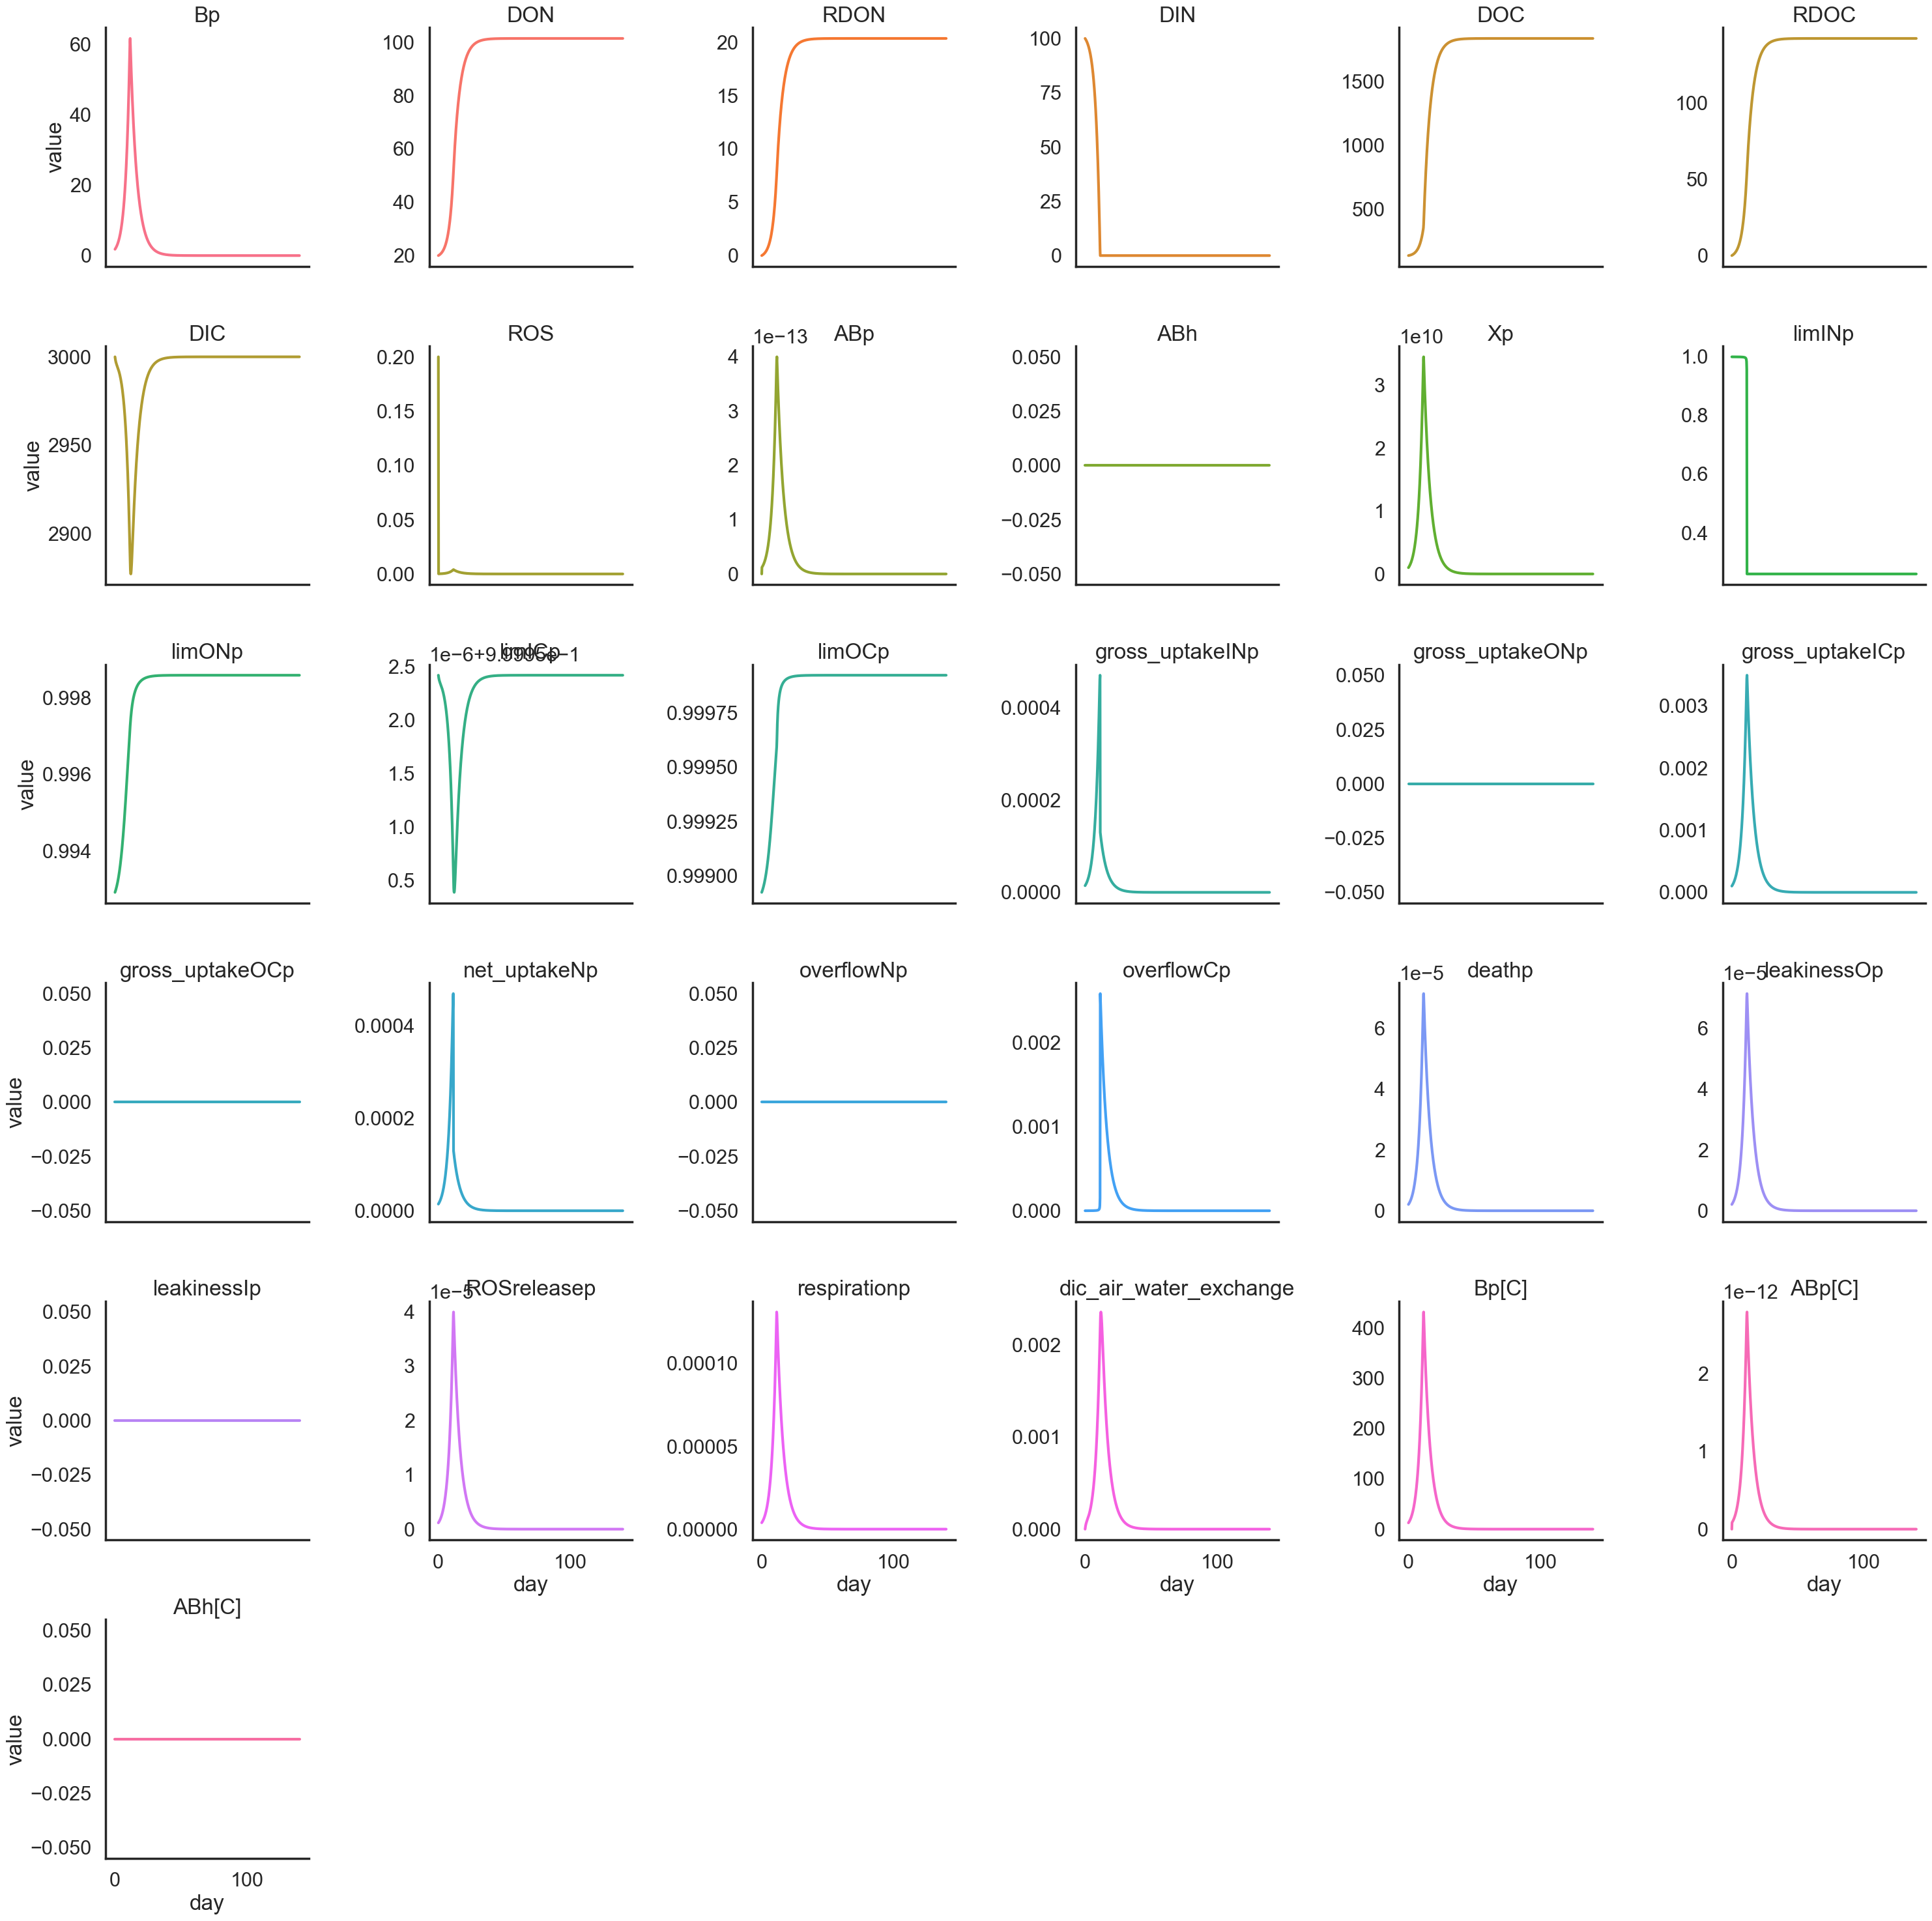

In [18]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [19]:
refdf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312',
       'mit9312', 'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]',
       'Bh[C]', 'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [20]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

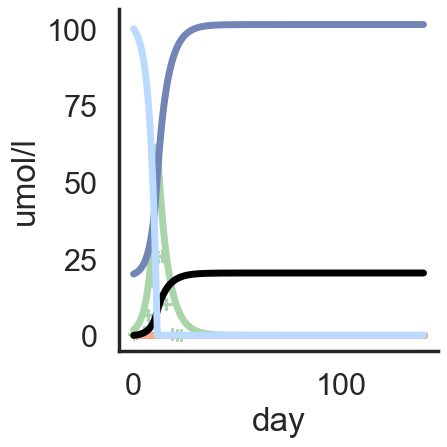

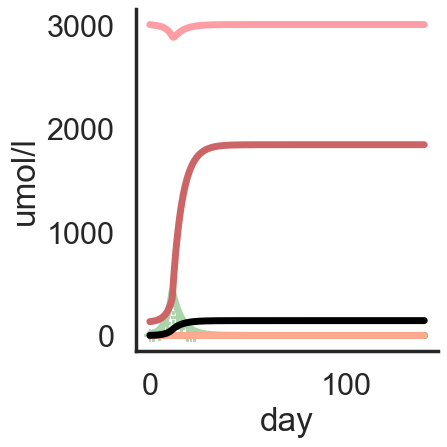

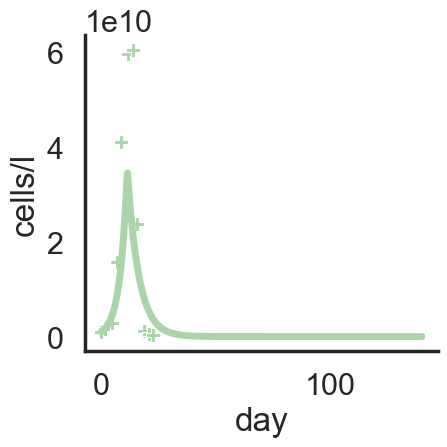

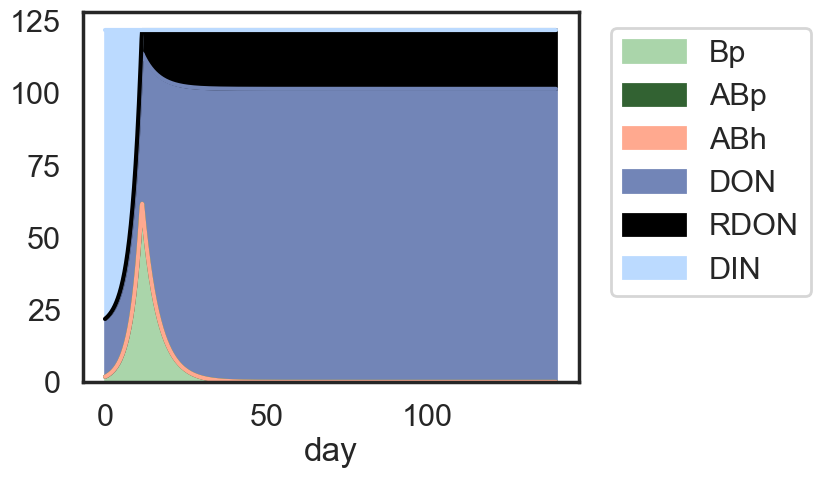

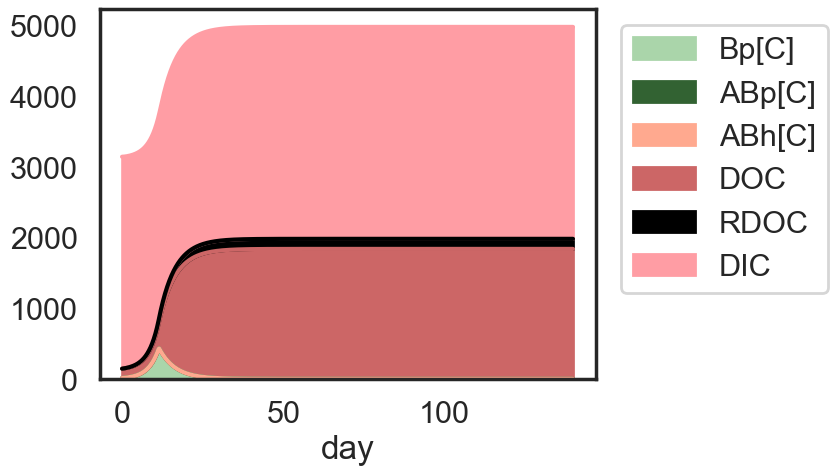

In [21]:
from matplotlib.colors import LinearSegmentedColormap
df[pnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pnpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()
df[pcorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", pcpalette) 
                               )
plt.legend(loc='upper right', bbox_to_anchor =(1.5,1))
plt.show()


In [22]:
sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=[PCOLOR_light], 
           ).set(ylabel='cells/l', yscale='log')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False,color=PCOLOR_light, marker='P')


<AxesSubplot:xlabel='day', ylabel='cells/l'>

In [23]:
len(param_vals)

In [24]:
df.min()

Bp                        4.395707e-10
DON                       2.000000e+01
RDON                      0.000000e+00
DIN                       5.008800e-02
DOC                       1.325000e+02
RDOC                      0.000000e+00
DIC                       2.877144e+03
ROS                       2.849729e-14
ABp                       0.000000e+00
ABh                       0.000000e+00
t                         0.000000e+00
day                       0.000000e+00
Xp                        2.461596e-01
limINp                    2.597403e-01
limONp                    9.929130e-01
limICp                    9.999504e-01
limOCp                    9.989238e-01
gross_uptakeINp           9.250225e-16
gross_uptakeONp           0.000000e+00
gross_uptakeICp           2.492817e-14
gross_uptakeOCp           0.000000e+00
net_uptakeNp              9.250225e-16
overflowNp                0.000000e+00
overflowCp                1.845301e-14
deathp                    5.087623e-16
leakinessOp              